In [1]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 데이터 불러오기 + 데이터 앞부분 미리보기 (SPY 주가를 가져왔다.)
df = pd.read_csv("SPY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500


In [4]:
# 데이터 요약
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7193.000000,7193.000000,7193.000000,7193.000000,7193.000000,7.193000e+03
mean,149.569786,150.446365,148.596184,149.573008,124.130425,8.432958e+07
std,80.710651,81.049916,80.339373,80.732359,86.543832,9.571367e+07
min,43.343750,43.531250,42.812500,43.406250,25.487831,5.200000e+03
25%,100.739998,101.593750,99.790001,100.699997,71.142609,8.162800e+06
50%,128.125000,128.860001,127.269997,128.187500,93.903046,5.864900e+07
75%,190.369995,191.820007,188.789993,190.300003,168.407654,1.195754e+08
max,445.589996,447.109985,445.070007,446.970001,446.970001,8.710263e+08


In [3]:
# 데이터 가공하기. 필요한 수정주가 + 날짜 부분만 갖고온다. 원본데이터 훼손방지를 위해 .copy를 쓴다.

price_df =df.loc[:,['Date','Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,25.799770
1,1993-02-01,25.983273
2,1993-02-02,26.038315
3,1993-02-03,26.313566
4,1993-02-04,26.423655


In [5]:
# 위에서 본 Date를 Dataframeindex로 변환시켜주자. inplace옵션 = 따로 저장하지 않아도 바로 적용되도록함

price_df.set_index(['Date'],inplace=True)
price_df.head()

,Adj Close
Date,
1993-01-29,25.799770
1993-02-01,25.983273
1993-02-02,26.038315
1993-02-03,26.313566
1993-02-04,26.423655


In [6]:
price_df.tail()

,Adj Close
Date,
2021-08-16,446.970001
2021-08-17,444.040009
2021-08-18,439.179993
2021-08-19,439.859985
2021-08-20,443.359985


먼저 불린저밴드 공식을 사용할 것이다. 불린저밴드에 대한 자세한 설명은 생략한다.
* 상단밴드 = 중간밴드 + 2 * (20일 이동 표준편차)
* 중간밴드 = 20일 이동평균선
* 하단밴드 = 중간밴드 - 2 * (20일 이동 표준편차)

In [7]:
# 먼저 중간밴드를 계산해보자.
# rolling 함수는 일정구간 데이터들의 평균,최소,최대를 구해주는 함수다. (20개의 행으로 평균 계산)
# iloc 함수는 loc함수와 같지만 몇번째 행이냐를 기준으로 자른다.

price_df['center'] = price_df['Adj Close'].rolling(window = 20).mean()
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.038315,NaN
1993-02-26,26.075027,25.997031
1993-03-01,26.001619,26.007123
1993-03-02,26.386965,26.027308
1993-03-03,26.497063,26.050245
1993-03-04,26.350250,26.052080
1993-03-05,26.276848,26.044739


<AxesSubplot:xlabel='Date'>

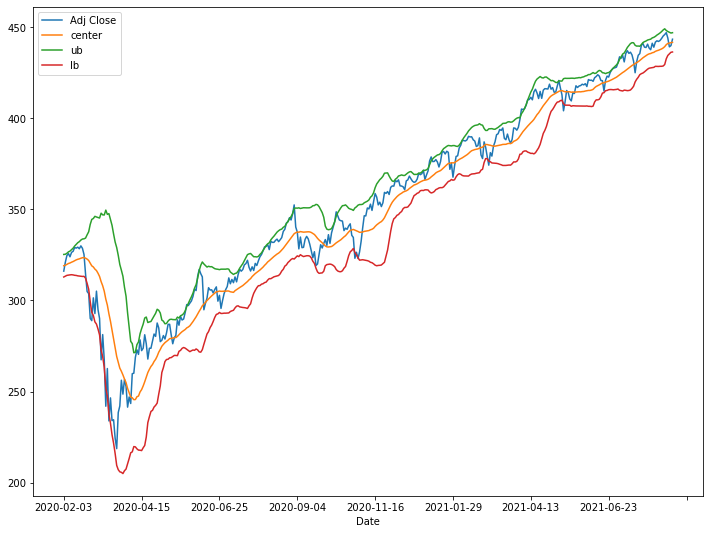

In [9]:
# 주가차트처럼 시각화를 해보자. 노랑색 선이 불린저밴드의 중간밴드다.
plt.rcParams["figure.figsize"] = (12, 9)
price_df.loc['2020-02':].plot()

In [8]:
# 상단밴드와 하단밴드를 계산하자.
# ub=상단밴드 lb=하단밴드
price_df['ub'] = price_df['center']+ 2*price_df['Adj Close'].rolling(window=20).std()
price_df['lb'] = price_df['center']- 2*price_df['Adj Close'].rolling(window=20).std()
price_df.loc['2020-02':].head()

,Adj Close,center,ub,lb
Date,,,,
2020-02-03,316.105225,319.075415,325.265070,312.885760
2020-02-04,320.923065,319.339713,325.360310,313.319116
2020-02-05,324.629120,319.833690,325.889643,313.777736
2020-02-06,325.721436,320.298409,326.671797,313.925020
2020-02-07,323.985413,320.569048,327.091820,314.046275


<AxesSubplot:xlabel='Date'>

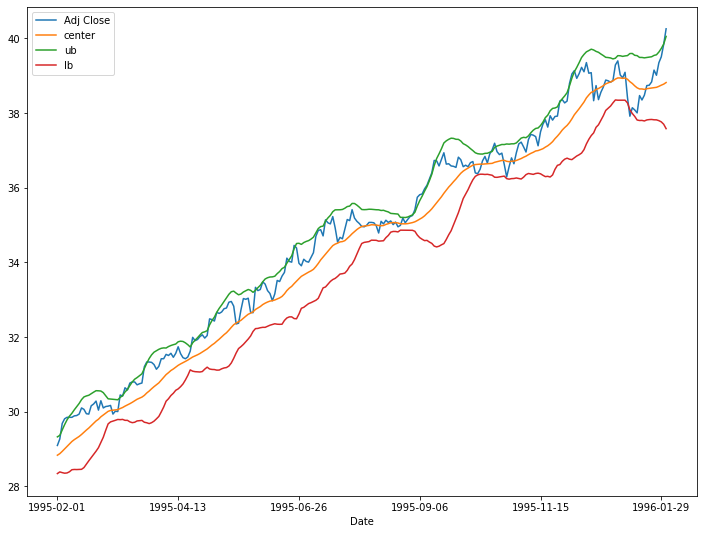

In [10]:
# 시각화를 해보자
price_df.loc['1995-02':'1996-02'].plot()

In [11]:
# 불린저밴드는 다음에도 다시 사용할 수 있도록 파이썬 함수로 지정합니다.

n = 20
sigma = 2
def bollinger_band(price_df,n,sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(n).mean()
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std()
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std()
    return bb
bollinger = bollinger_band(price_df,n,sigma)

In [12]:
# 이건 조금 이해가 잘 안되네. 뭐한거지?

base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample = price_df.loc[base_date:]

In [13]:
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,72.549080,68.954893,72.006866,65.902920
2009-01-05,72.463203,69.276309,72.386893,66.165725
2009-01-06,72.947075,69.520118,72.977904,66.062333
2009-01-07,70.761864,69.535835,73.014166,66.057504
2009-01-08,71.050621,69.624051,73.164669,66.083432


In [14]:
# 이제 진입/청산신호가 발생할 때 행동을 기록할 데이터프레임을 만들어봅시다.
# ='' 를 쓰면 빈 열이 만들어지는구나..

book = sample[['Adj Close']].copy()
book['trade'] = ''
book.head()

,Adj Close,trade
Date,,
2009-01-02,72.549080,
2009-01-05,72.463203,
2009-01-06,72.947075,
2009-01-07,70.761864,
2009-01-08,71.050621,


In [20]:
# 위함수는 다음에도 다시 사용할 수 있도록 파이썬 함수로 지정합니다.

def create_trade_book(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return (book)

In [22]:
# 거래전략이다. 잘 모르겠는데.. 다시 공부해보도록 하자.

def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']:
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']:
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'
            else:
                book.loc[i, 'trade'] = 'buy'
        elif sample.loc[i,'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i,
            'Adj Close'] >= sample.loc[i, 'lb']:
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'
            else:
                book.loc[i, 'trade'] = ''
    return (book)

In [23]:
# 결과물을 확인해보자. 2021-06-24를 마지막으로 청산해서 다시 진입하지 않았다.
book = tradings(sample,book)
book.tail(50)

,Adj Close,trade
Date,,
2021-06-11,422.926361,buy
2021-06-14,423.873260,buy
2021-06-15,423.095825,buy
2021-06-16,420.733521,buy
2021-06-17,420.593994,buy
2021-06-18,414.920013,buy
2021-06-21,420.859985,buy
2021-06-22,423.109985,buy
2021-06-23,422.600006,buy


<AxesSubplot:xlabel='Date'>

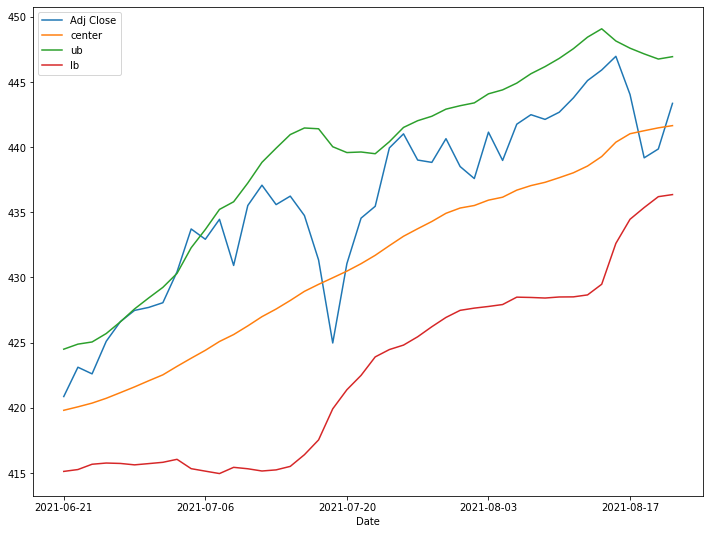

In [24]:
# 실제로 6월 24일 부근에 불린저밴드 상단을 뛰어넘었다.
price_df.loc['2021-06-20':].plot()


In [29]:
# 전체 수익률 계산 함수 만들기.

def returns(book):
    # 손익계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        #long 진입
        if book.loc[i,'trade'] == 'buy' and book.shift(1).loc[i,'trade'] =='':
            buy = book.loc[i,'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ',buy)
        # long 청산
        elif book.loc[i,'trade'] == '' and book.shift(1).loc[i,'trade'] == 'buy':
            sell = book.loc[i,'Adj Close']
            rtn = (sell -buy) / buy + 1 # 손익 계산
            book.loc[i,'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ',buy, ' : long 청산가격 : ', \
                 sell, ' : return:', round(rtn,4))
            
        if book.loc[i,'trade'] == '':
            buy = 0.0
            sell = 0.0
    
    acc_rtn =1.0
    for i in book.index:
        rtn  = book.loc[i,'return']
        acc_rtn = acc_rtn * rtn # 누적수익률 계산
        book.loc[i,'acc return'] = acc_rtn
    
    print('Accumulated return  :', round(acc_rtn, 4))
    return(round(acc_rtn,4))

In [38]:
book

,Adj Close,trade,return,acc return
Date,,,,
2009-01-02,72.549080,,1.0,1.000000
2009-01-05,72.463203,,1.0,1.000000
2009-01-06,72.947075,,1.0,1.000000
2009-01-07,70.761864,,1.0,1.000000
2009-01-08,71.050621,,1.0,1.000000
...,...,...,...,...
2021-08-16,446.970001,,1.0,3.973258
2021-08-17,444.040009,,1.0,3.973258
2021-08-18,439.179993,,1.0,3.973258


In [30]:
print(returns(book))

진입일 :  2009-01-20 long 진입가격 :  62.879501
청산일 :  2009-03-23 long 진입가격 :  62.879501  : long 청산가격 :  64.626511  : return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  87.204201
청산일 :  2010-04-14 long 진입가격 :  87.204201  : long 청산가격 :  97.168732  : return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  94.226173
청산일 :  2010-10-13 long 진입가격 :  94.226173  : long 청산가격 :  95.505241  : return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  105.793922
청산일 :  2011-04-26 long 진입가격 :  105.793922  : long 청산가격 :  110.219398  : return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  107.987053
청산일 :  2011-06-30 long 진입가격 :  107.987053  : long 청산가격 :  108.448463  : return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  103.123413
청산일 :  2012-02-03 long 진입가격 :  103.123413  : long 청산가격 :  111.837234  : return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  113.462784
청산일 :  2012-07-03 long 진입가격 :  113.462784  : long 청산가격 :  115.31794  : return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  119.316795
청산일 :  2012-12-18 long 진입가격 :  119.316795  : long 청산가격 :  122.649

<AxesSubplot:xlabel='Date'>

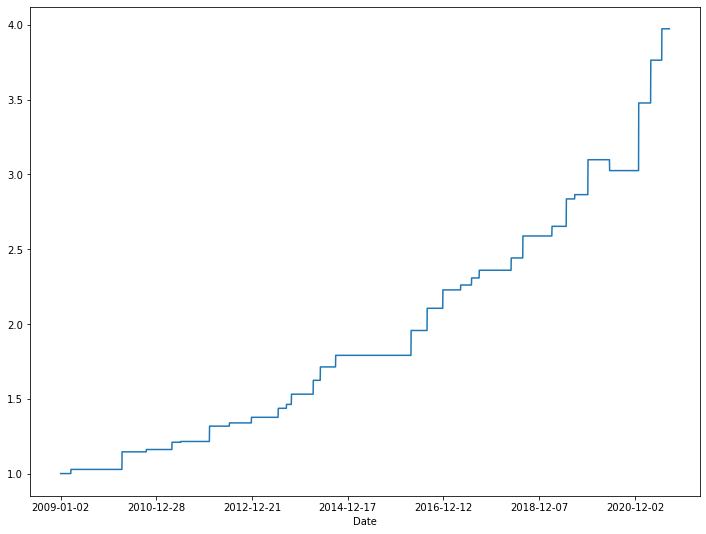

In [31]:
book['acc return'].plot()